In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
# Load the IMDB Reviews dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)


Here, the IMDB Reviews dataset is loaded using the load_data function from the Keras API in TensorFlow. It loads the IMDB movie reviews dataset, which consists of movie reviews labeled by sentiment (positive or negative). The num_words=10000 argument restricts the dataset to use only the 10,000 most frequent words in the dataset, which helps in managing the dataset size.

In [ ]:
x_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [ ]:
y_train

array([1, 0, 0, ..., 0, 1, 0])

The sequences (movie reviews) are padded or truncated to a fixed length of max_len (in this case, 500) using the pad_sequences function. Padding ensures that all sequences have the same length for efficient processing.

In [ ]:
# Pad the sequences to have equal length
max_len = 500
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)



In [ ]:
x_train

array([[   0,    0,    0, ...,   19,  178,   32],
       [   0,    0,    0, ...,   16,  145,   95],
       [   0,    0,    0, ...,    7,  129,  113],
       ...,
       [   0,    0,    0, ...,    4, 3586,    2],
       [   0,    0,    0, ...,   12,    9,   23],
       [   0,    0,    0, ...,  204,  131,    9]], dtype=int32)

These lines define the input and output dimensions. input_dim is set to 10,000, which corresponds to the vocabulary size (number of unique words in the dataset), and output_dim is set to 1, indicating a binary classification task (positive or negative sentiment).
Here, an input layer is created using the Input function from Keras. It defines the shape of the input data, which is (None,) indicating that the input can have a variable length.

In [ ]:
# Set the input and output dimensions
input_dim = 10000
output_dim = 1
# Create the input layer
inputs = tf.keras.Input(shape=(None,), dtype="int32")

# Create the model
#This line creates an embedding layer, which is used to convert input
#integer indices into dense vectors of fixed size. The output dimension
#of the embeddings is 128.
x = tf.keras.layers.Embedding(input_dim, 128)(inputs)
#These lines define a Bidirectional LSTM layer with 64 units. Bidirectional
#LSTMs process the input sequences in both forward and backward directions,
# allowing the model to capture information from both past and future contexts.
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True))(x)
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64))(x)
outputs = tf.keras.layers.Dense(output_dim, activation="sigmoid")(x)
model = tf.keras.Model(inputs, outputs)
#Here, a Dense layer with a sigmoid activation function is added to
#produce the final output. The model is then created using the Model
#function from Keras, specifying the input and output layers.
# Compile the model
#The model is compiled using the Adam optimizer, binary cross-entropy loss
#function (suitable for binary classification), and accuracy as the evaluation
#metric.
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])


In [ ]:
# Train the model
batch_size = 32
epochs = 5
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))


Epoch 1/5
782/782 [==============================] - 1339s 2s/step - loss: 0.4103 - accuracy: 0.8116 - val_loss: 0.3221 - val_accuracy: 0.8644
Epoch 2/5
782/782 [==============================] - 1293s 2s/step - loss: 0.2461 - accuracy: 0.9046 - val_loss: 0.3219 - val_accuracy: 0.8742
Epoch 3/5
782/782 [==============================] - 1348s 2s/step - loss: 0.1844 - accuracy: 0.9308 - val_loss: 0.3384 - val_accuracy: 0.8658
Epoch 4/5
782/782 [==============================] - 1296s 2s/step - loss: 0.1318 - accuracy: 0.9525 - val_loss: 0.4160 - val_accuracy: 0.8685
Epoch 5/5
782/782 [==============================] - 1305s 2s/step - loss: 0.0972 - accuracy: 0.9662 - val_loss: 0.4265 - val_accuracy: 0.8636


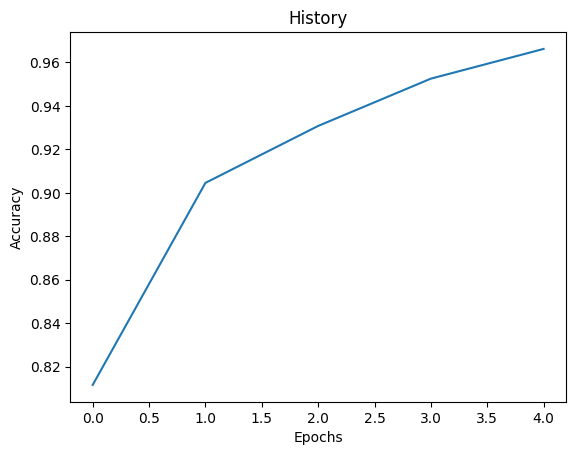

In [ ]:
# Plot the accuracy
fig = plt.plot(history.history['accuracy'])
title = plt.title("History")
xlabel = plt.xlabel("Epochs")
ylabel = plt.ylabel("Accuracy")


<ipython-input-13-082e2c157e2a>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


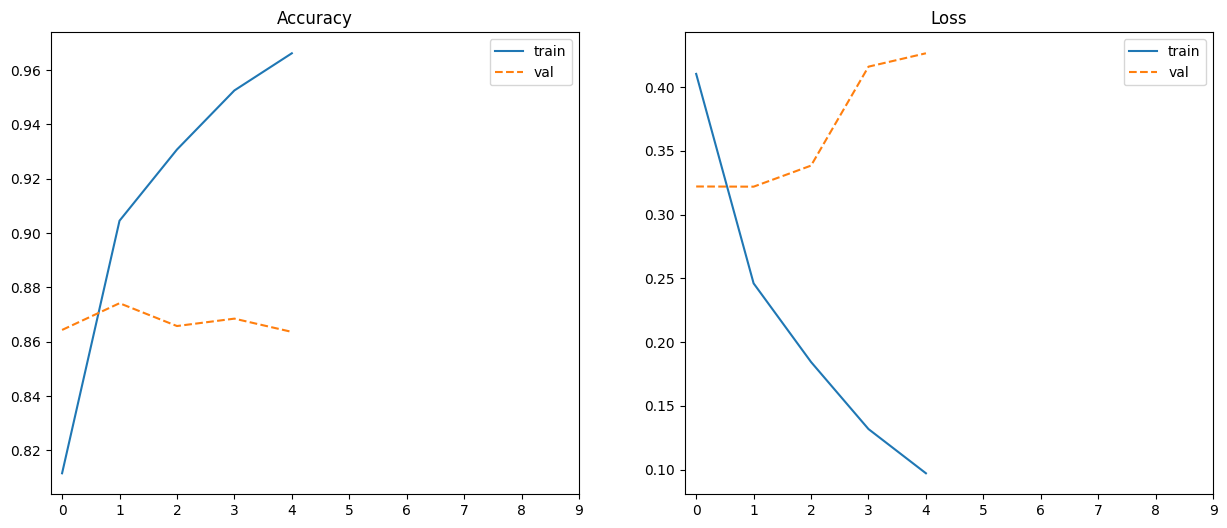

In [ ]:
plt.subplots(figsize=(15,6))
#accuracy
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="val",linestyle='dashed')
plt.xticks(np.arange(10))
plt.title("Accuracy")
plt.legend()
#loss
plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="val",linestyle='dashed')
plt.xticks(np.arange(10))
plt.title("Loss")
plt.legend()

plt.show()

In [ ]:
predictions = model.predict(x_test[:4])
for pred in predictions:
    print(np.argmax(pred[0]))


1/1 [==============================] - 2s 2s/step
0
0
0
0


In [ ]:
x_test[:4]

array([[   0,    0,    0, ...,   14,    6,  717],
       [   0,    0,    0, ...,  125,    4, 3077],
       [  33,    6,   58, ...,    9,   57,  975],
       [   0,    0,    0, ...,   28,  314, 1772]], dtype=int32)

In [ ]:
y_test[:4]

array([0, 1, 1, 0])